In [2]:
import pandas as pd

# Make the filenames are coherent to the uploaded ones
pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')

In [3]:
# Double-check the names of the columns
print(pokemon.columns.tolist())

['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [4]:
# Normalize the columns
pokemon.columns = (
    pokemon.columns
    .str.strip()
    .str.lower()
    .str.replace('.', '', regex=False)
    .str.replace(' ', '_')
)

# Make sure legendary is integer
pokemon['legendary'] = pokemon['legendary'].astype(int)

# Select the features
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'legendary']
pokemon = pokemon[['#', 'name'] + stats]


In [5]:
# Create a copy of the combat dataset
combat_df = combats.copy()
combat_df.columns = ['first_pokemon', 'second_pokemon', 'winner']

# Define a function to extract the stats given an id
def get_stats(poke_id):
    return pokemon[pokemon['#'] == poke_id][stats].values[0]

# X: features; Y: label
X = []
y = []

# Iterate over each combat, define feature difference as X and result as Y
for _, row in combat_df.iterrows():
    p1_stats = get_stats(row['first_pokemon'])
    p2_stats = get_stats(row['second_pokemon'])

    feature_diff = p1_stats - p2_stats
    X.append(feature_diff)

    winner = 1 if row['winner'] == row['first_pokemon'] else 0
    y.append(winner)



In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [14]:
X = np.array(X)
y = np.array(y)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide train/test splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evals
model_accuracy = accuracy_score(y_test, y_pred)
model_cm = confusion_matrix(y_test, y_pred)
model_report = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", model_accuracy)
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", model_cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8903
F1 Score: 0.8833351058172924
Confusion Matrix:
 [[4750  497]
 [ 600 4153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      5247
           1       0.89      0.87      0.88      4753

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [8]:
from sklearn.metrics import log_loss
probs = model.predict_proba(X_test)
print("Log Loss (Negative Log-Likelihood):", log_loss(y_test, probs))

Log Loss (Negative Log-Likelihood): 0.3651426789745947


In [9]:
for stat, coef in zip(stats, model.coef_[0]):
    print(f"{stat}: {coef:.4f}")

hp: 0.0841
attack: 0.4418
defense: 0.0711
sp_atk: -0.0367
sp_def: 0.0533
speed: 2.6503
legendary: -0.0530


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
rf_pred = rf_model.predict(X_test)

# Evals
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))



Random Forest Results:
Accuracy: 0.9504
F1 Score: 0.9482254697286012
Confusion Matrix:
 [[4962  285]
 [ 211 4542]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      5247
           1       0.94      0.96      0.95      4753

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



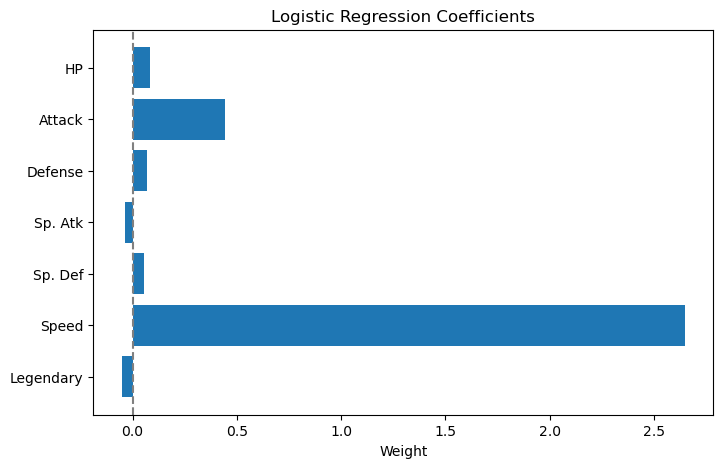

In [10]:
import matplotlib.pyplot as plt

feature_names = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']
weights = model.coef_[0]

plt.figure(figsize=(8, 5))
plt.barh(feature_names, weights)
plt.xlabel("Weight")
plt.title("Logistic Regression Coefficients")
plt.axvline(0, color='gray', linestyle='--')
plt.gca().invert_yaxis()
plt.show()

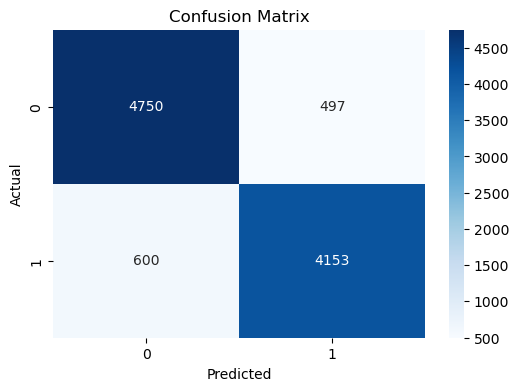

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
best_model = model

import joblib

model_file_name = "log_reg_best_model.joblib"

model_results = {
    'model': best_model,
    'accuracy': model_accuracy,
    'classification_report': model_report,
    'confusion_matrix': model_cm
}

joblib.dump(model_results, model_file_name)

['log_reg_best_model.joblib']